<a href="https://colab.research.google.com/github/yuki-tamaribuchi/kaggle_codes/blob/master/kaggle_spotify_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp -r drive/'My Drive'/spotify_datasets/ /content/

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.10f}'.format

In [3]:
spotify_df=pd.read_csv('spotify_datasets/genres_v2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.8310000000,0.8140000000,2,-7.3640000000,1,0.4200000000,0.0598000000,0.0134000000,0.0556000000,0.3890000000,156.9850000000,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,nan,NaN
1,0.7190000000,0.4930000000,8,-7.2300000000,1,0.0794000000,0.4010000000,0.0000000000,0.1180000000,0.1240000000,115.0800000000,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,nan,NaN
2,0.8500000000,0.8930000000,5,-4.7830000000,1,0.0623000000,0.0138000000,0.0000041400,0.3720000000,0.0391000000,218.0500000000,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,nan,NaN
3,0.4760000000,0.7810000000,0,-4.7100000000,1,0.1030000000,0.0237000000,0.0000000000,0.1140000000,0.1750000000,186.9480000000,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),nan,NaN
4,0.7980000000,0.6240000000,2,-7.6680000000,1,0.2930000000,0.2170000000,0.0000000000,0.1660000000,0.5910000000,147.9880000000,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,nan,NaN


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [6]:
spotify_df=spotify_df.drop(['song_name','Unnamed: 0','title','uri','track_href','analysis_url','type','id'],axis=1)

In [7]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
 13  genre             42305 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 4.5+ MB


In [8]:
time_signature_dummies=pd.get_dummies(spotify_df['time_signature'],prefix='time_signature')

le_genre=LabelEncoder()
genre_labels=pd.DataFrame(le_genre.fit_transform(spotify_df['genre']))

spotify_df=spotify_df.drop(['key','time_signature','genre','mode'],axis=1)
#spotify_df=pd.concat([spotify_df,time_signature_dummies],axis=1)

scaler=StandardScaler()
scaled_spotify_df=pd.DataFrame(scaler.fit_transform(spotify_df))

In [9]:
spotify_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.8310000000,0.8140000000,-7.3640000000,0.4200000000,0.0598000000,0.0134000000,0.0556000000,0.3890000000,156.9850000000,124539
1,0.7190000000,0.4930000000,-7.2300000000,0.0794000000,0.4010000000,0.0000000000,0.1180000000,0.1240000000,115.0800000000,224427
2,0.8500000000,0.8930000000,-4.7830000000,0.0623000000,0.0138000000,0.0000041400,0.3720000000,0.0391000000,218.0500000000,98821
3,0.4760000000,0.7810000000,-4.7100000000,0.1030000000,0.0237000000,0.0000000000,0.1140000000,0.1750000000,186.9480000000,123661
4,0.7980000000,0.6240000000,-7.6680000000,0.2930000000,0.2170000000,0.0000000000,0.1660000000,0.5910000000,147.9880000000,123298
...,...,...,...,...,...,...,...,...,...,...
42300,0.5280000000,0.6930000000,-5.1480000000,0.0304000000,0.0315000000,0.0003450000,0.1210000000,0.3940000000,150.0130000000,269208
42301,0.5170000000,0.7680000000,-7.9220000000,0.0479000000,0.0225000000,0.0000182000,0.2050000000,0.3830000000,149.9280000000,210112
42302,0.3610000000,0.8210000000,-3.1020000000,0.0505000000,0.0260000000,0.0002420000,0.3850000000,0.1240000000,154.9350000000,234823
42303,0.4770000000,0.9210000000,-4.7770000000,0.0392000000,0.0005510000,0.0296000000,0.0575000000,0.4880000000,150.0420000000,323200


In [10]:
genre_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
42300,9
42301,9
42302,9
42303,9


In [11]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.ticker as ticker

In [12]:
pca=PCA()
spotify_features_df=pd.DataFrame(pca.fit_transform(scaled_spotify_df),columns=['PC{}'.format(x+1) for x in range(len(scaled_spotify_df.columns))])

In [13]:
spotify_features_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.9204736959,-0.7339096574,-0.9234933524,-0.4348248873,0.2007023042,1.8141390103,0.3183451653,0.2587151395,-0.6501857686,0.7727139297
1,1.4717500299,1.5908263824,0.8368300268,0.4410737962,-1.5201338212,-0.2156359150,0.5514441758,-1.1432458193,0.2706267543,-0.1592022693
2,0.3587063240,-1.8307160765,0.9245803695,-0.8357426852,1.0125090818,0.3785656250,-2.2230501078,-1.8069805798,-1.2324348959,1.2181047438
3,0.2203124688,-1.4589309546,1.5545315594,-1.4383367009,-0.2183001653,0.2823234203,-0.7767982402,0.1313451044,-0.2498445391,0.1296467610
4,2.4789520407,-0.1718466412,-0.7109694449,0.1924491054,0.0320726836,0.2089607911,0.1173900591,0.2368405788,-0.4026204817,0.0659957183


In [14]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.2590906743
1,0.1919809684
2,0.1289495181
3,0.0930547373
4,0.0845363357
5,0.0728208880
6,0.0633993168
7,0.0466201338
8,0.0388810547
9,0.0206663728


In [15]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))

,0
0,0.2590906743
1,0.4510716428
2,0.5800211609
3,0.6730758982
4,0.7576122339
5,0.8304331219
6,0.8938324387
7,0.9404525725
8,0.9793336272
9,1.0000000000


[]

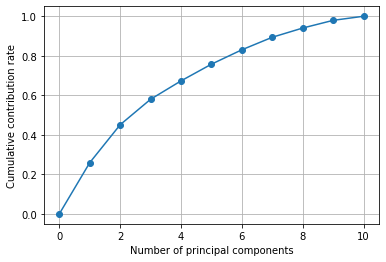

In [16]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0]+list(np.cumsum(pca.explained_variance_ratio_)),'-o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative contribution rate')
plt.grid()
plt.plot()

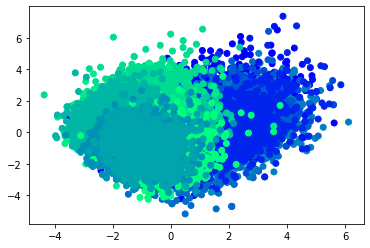

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(spotify_features_df['PC1'],spotify_features_df['PC2'],c=genre_labels,cmap='winter')

In [18]:
from mpl_toolkits.mplot3d import Axes3D

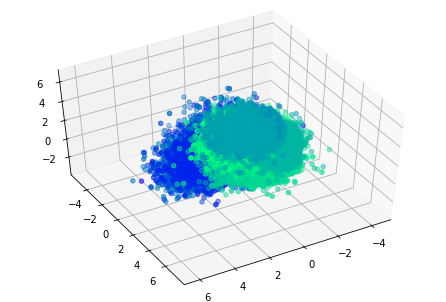

In [19]:
fig=plt.figure()
ax=Axes3D(fig)
surf=ax.scatter(spotify_features_df['PC1'],spotify_features_df['PC2'],spotify_features_df['PC3'],c=genre_labels,cmap='winter')
ax.view_init(elev=50, azim=60)

In [20]:
spotify_features_df=spotify_features_df.iloc[:,:6]
X_train,X_test,y_train,y_test=train_test_split(spotify_features_df,genre_labels,test_size=0.2)

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
sgd_clf.score(X_test,y_test)

0.3848244888311074

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.score(X_test,y_test)

0.5245242879092306

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
tree_clf.score(X_test,y_test)

0.4878855927195367